##Natural Language Processing

#### Natural Language vs Machine language
Human languages are called "natural" languages in computer science
"Natural" languages are distinguished from languages designed for machines, like Assembly, LISP, or XML. <br>
Machine languages were designed with a set of formal rules before they were used. In contrast, natural language usage comes first and rules arise later. <br>
Natural language is shaped by an evolution process, similar to biological organisms. The rules of natural language, such as the grammar of English, were formalized after the fact. The rules of natural language are often ignored or broken by users. <br>
Machine-readable language is highly structured and rigorous, using precise syntactic rules to weave together exactly defined concepts from a fixed vocabulary. <br>
Natural language is messy, ambiguous, chaotic, sprawling, and constantly in flux. <br>


The internet is mostly text. Language is how we store almost all of
our knowledge. Our very thoughts are largely built upon language. However, the ability to understand natural language has long eluded machines. <br>


Some people once thought you could write down the "rule set of English" to create NLP systems. Early attempts at NLP were made through the lens of "applied linguistics". EX: Famous programs like ELIZA from the 1960s used pattern matching for basic conversation<br>


Faster computers and greater data availability led to a better alternative for NLP systems. <br>
Building systems with ad hoc rules led engineers to ask if they could use a **corpus** (a collection of written texts) of data **to automate the process of finding rules**. <br>
Engineers started looking for ways to search for rules within some kind of rule space using machine learning. <br>
Hence, Machine learning became a new approach to building NLP systems. <br>
The earliest ones were based on **decision trees**—the intent was literally to automate the development of the kind of if/then/else rules of previous systems. Then statistical approaches started gaining speed, starting with **logistic regression**

### modern NLP is
using machine learning and large datasets to
give computers the ability not to understand language but
to ingest a piece of language as input and return something useful, like predicting the
following:<br>
“What’s the topic of this text?” (text classification) <br>
“Does this text contain abuse?” (content filtering)<br>
“Does this text sound positive or negative?” (sentiment analysis)<br>
“What should be the next word in this incomplete sentence?” (language modeling)<br>
“How would you say this in German?” (translation)<br>
“How would you summarize this article in one paragraph?” (summarization)

### Neural Networks

The toolset of NLP—decision trees, logistic regression—only saw slow evolution from the 1990s to the early 2010s. <br>
Around 2014-2015 researchers began to investigate the language-understanding capabilities of **recurrent neural networks**, in particular LSTM. <br>
In early 2015, Keras made available the first open source, easy-to-use implementation of LSTM. Then from 2015 to 2017, recurrent neural networks dominated the booming NLP scene. <br>
around 2017–2018, a new architecture rose to replace RNNs: the **Transformer**

## Preparing text data

Deep learning models, being differentiable functions, can only process numeric tensors, they can’t take raw text as input. Vectorizing text is the process of transforming text into numeric tensors.



1. First, you standardize the text to make it easier to process, such as by converting it to lowercase or removing punctuation.
2. You split the text into units (called tokens), such as characters, words, or groups of words. This is called tokenization.
3. You convert each such token into a numerical vector. This will usually involve first indexing all tokens present in the data. (vectorization)




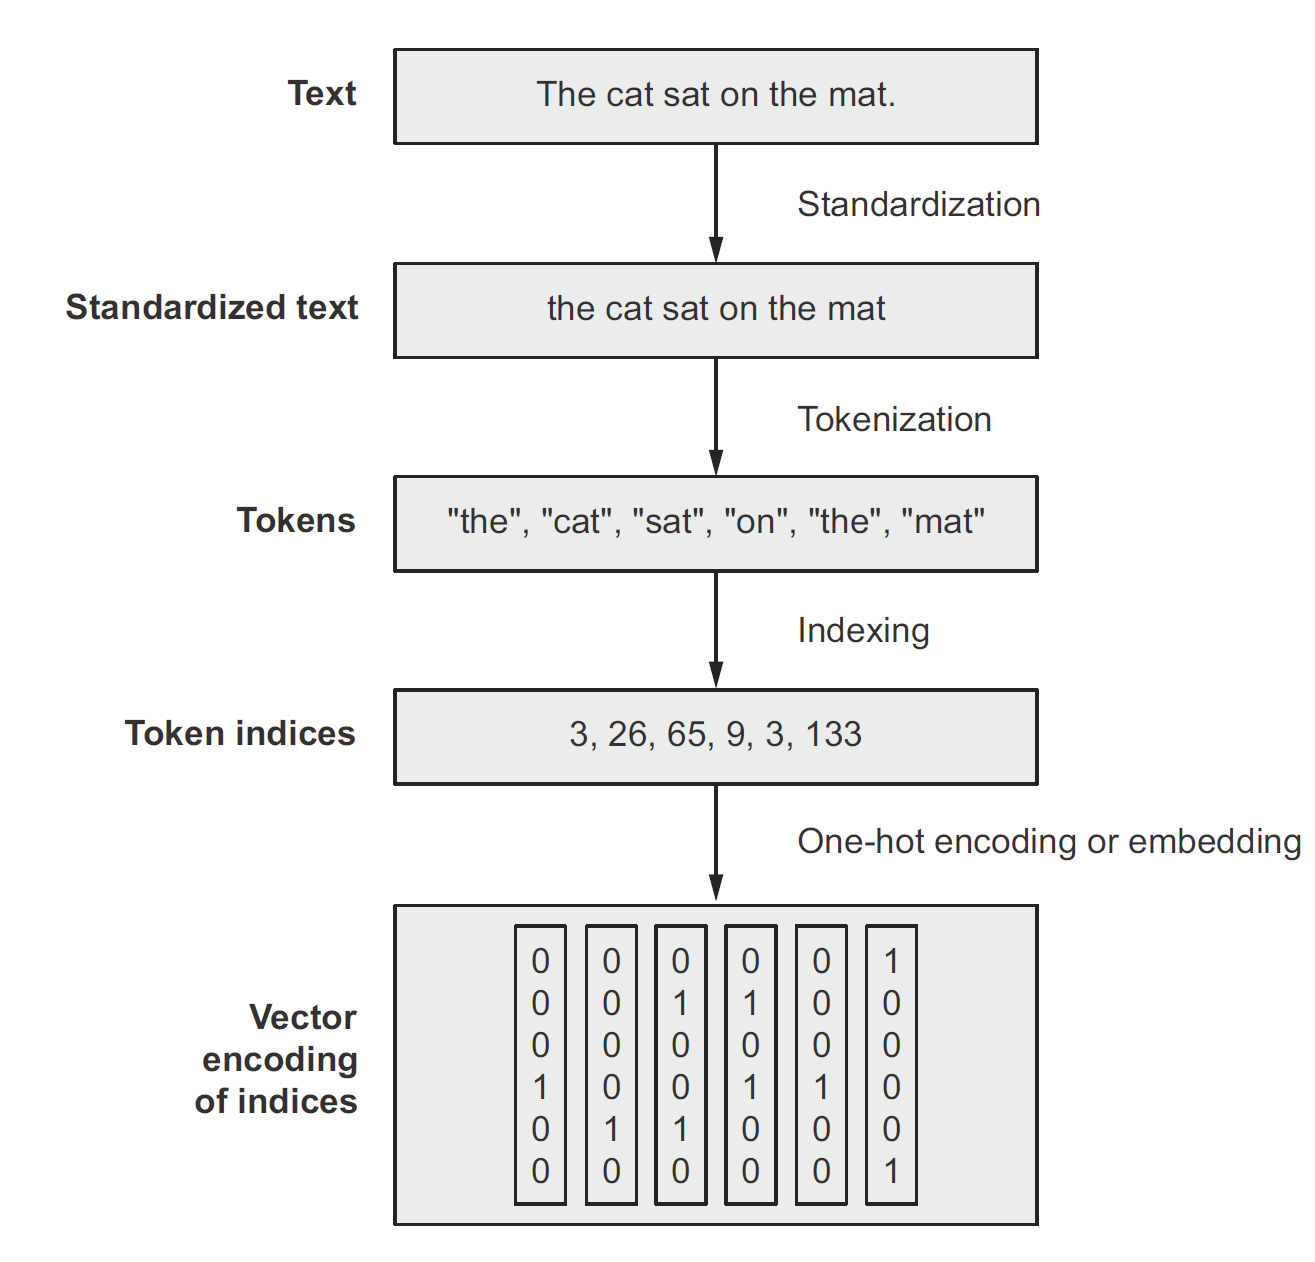

### Text standardization

Consider these two sentences:
1. “sunset came. i was staring at the Mexico sky. Isnt nature splendid??”
2. “Sunset came; I stared at the México sky. Isn’t nature splendid?”

they’re almost identical. Yet, if you were to convert them
to byte strings, they would end up with very different representations, because “i” and “I” are two different characters, “Mexico” and “México” are two different words. <br>
Text standardization is a basic form of feature engineering that aims to erase encoding differences that you don’t want your model to have to deal with.

“**convert to lowercase and remove punctuation characters**.” Our two sentences would become
1. “sunset came i was staring at the mexico sky isnt nature splendid”
2. “sunset came i stared at the méxico sky isnt nature splendid”

Another common transformation is to **convert special characters to a standard form**, such as replacing “é” with “e,” “æ” with “ae,” and so on. Our token “méxico” would then become “mexico”.

**stemming**: converting variations of a term (such as different
conjugated forms of a verb) into a single shared representation, like turning “caught” and “been catching” into “[catch]” or “cats” into “[cat]”. With stemming, “was staring” and “stared” would become something like “[stare]”, and our two similar sentences would finally end up with an identical encoding:

*   “sunset came i [stare] at the mexico sky isnt nature splendid”




### Text splitting (tokenization)

Once your text is standardized, you need to break it up into units to be vectorized (tokens), a step called tokenization. You could do this in three different ways:
1. Word-level tokenization—Where tokens are space-separated (or punctuation separated) substrings. A variant of this is to further split words into subwords when applicable—for instance, treating “staring” as “star+ing” or “called” as “call+ed.”
2. N-gram tokenization—Where tokens are groups of N consecutive words. For
instance, “the cat” or “he was” would be 2-gram tokens (also called bigrams).
3. Character-level tokenization—Where each character is its own token. In practice, this scheme is rarely used, and you only really see it in specialized contexts, like text generation or speech recognition.

### Vectorization

Once the text is split into tokens, each token is encoded into a numerical representation. One way to do this is to build an index of all terms found in the training data (the “vocabulary”), and assign a unique integer to each entry in the vocabulary. This is called **Indexing**. <br>
You can then convert that integer into a vector encoding that can be processed by a neural network.

In [ ]:
dataset = ["This is a sentence.", "This is another sentence."]
vocabulary = {}

for text in dataset:
    text = standardize(text)
    tokens = tokenize(text)
    for token in tokens:
        if token not in vocabulary:
            vocabulary[token] = len(vocabulary)

print(vocabulary)

Output:

{'this': 0, 'is': 1, 'a': 2, 'sentence': 3, 'another': 4}

In [ ]:
def one_hot_encode_token(token):
vector = np.zeros((len(vocabulary),))
token_index = vocabulary[token]
vector[token_index] = 1
return vector

In [ ]:
vocabulary = {'this': 0, 'is': 1, 'a': 2, 'sentence': 3, 'another': 4}
token = 'sentence'
vector = one_hot_encode_token(token)
print(vector)

Output:

[0. 0. 0. 1. 0.]

All the steps can be implemented in pure Python. However, in practice, you’ll work with the Keras TextVectorization layer, which is fast and efficient.

In [ ]:
from tensorflow.keras.layers import TextVectorization
text_vectorization = TextVectorization(
output_mode="int")

By default, the TextVectorization layer will use the setting “convert to lowercase and remove punctuation” for text standardization, and “split on whitespace” for tokenization. <br>
You can provide **custom functions** for standardization and tokenization,
which means the **layer is flexible** enough to handle any use case.

### Understanding N-grams and bag-of-words

There are two kinds of text-processing models: those that care about word order, called **sequence models**, and those that treat input words as a set, discarding their original order, called **bag-of-words models**

If you’re building a sequence model, you’ll use word-level tokenization,
and if you’re building a bag-of-words model, you’ll use N-gram tokenization. N-grams are a way to artificially inject a small amount of local word order information into the model.

**Bag-of-words:** The term “bag” here refers to the fact that you’re dealing with a set of tokens rather than a list or sequence: the tokens have no specific order. This family of tokenization methods is called bag-of-words (or bag-of-N-grams).

Because bag-of-words isn’t an order-preserving tokenization method (the tokens generated are understood as a set, not a sequence, and the general structure of the sentences is lost), it tends to be used in shallow language-processing models rather than in deep learning models.

Extracting N-grams is a form of feature engineering, and deep learning sequence models do away with this manual approach, replacing it with
hierarchical feature learning. One-dimensional convnets, recurrent neural networks, and Transformers are capable of learning representations for groups of words and characters without being explicitly told about the existence of such groups, by looking at continuous word or character sequences.